In [36]:
import numpy as np
import pandas as pd
import scipy as sp
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data sets


In [5]:
df=pd.read_csv("/home/sharafath/Downloads/train_u6lujuX_CVtuZ9i.csv")

# Quick Data Exploration

In [6]:
print(df.head(10))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000         

In [7]:
#summary of ONLY numerical fields
print(df.describe())


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [8]:
#The frequency table for Non-Numerical values
print( df['Property_Area'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


#Distribution analysis

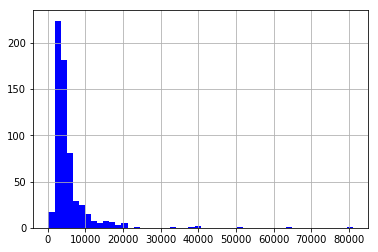

In [9]:
df['ApplicantIncome'].hist(bins=50,color='blue');

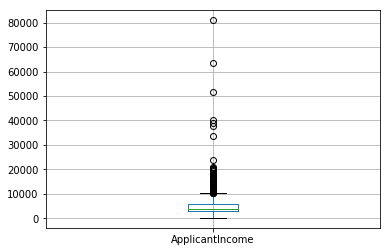

In [10]:
df.boxplot(column='ApplicantIncome');

/home/sharafath/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


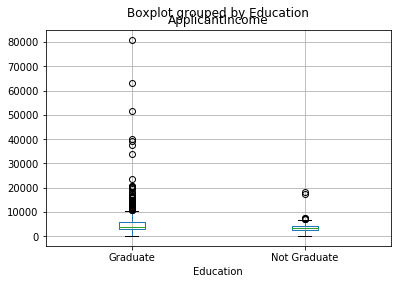

In [43]:
df.boxplot(column='ApplicantIncome', by = 'Education');

Let’s look at the histogram and boxplot of LoanAmount 

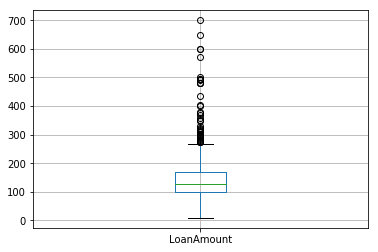

In [12]:
df.boxplot(column='LoanAmount');

# Categorical variable analysis

In [157]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print (temp1)
print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


## STOP HERE, LETS LEARN DATA MANIPULATION IN PANDAS

In [14]:
data=df

In [15]:
#1 – Boolean Indexing
data.loc[(data['Gender']=='Female') & (data["Education"]=='Not Graduate') & (data['Loan_Status']=="Y")]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
50,LP001155,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
205,LP001692,Female,No,0,Not Graduate,No,4408,0.0,120.0,360.0,1.0,Semiurban,Y
279,LP001908,Female,Yes,0,Not Graduate,No,4100,0.0,124.0,360.0,NaN,Rural,Y
403,LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y
407,LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,Y
439,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y
463,LP002489,Female,No,1,Not Graduate,NaN,5191,0.0,132.0,360.0,1.0,Semiurban,Y
468,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
480,LP002534,Female,No,0,Not Graduate,No,4350,0.0,154.0,360.0,1.0,Rural,Y


In [16]:
#2 – Apply Function
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print(data.apply(num_missing,axis=0))

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [17]:
print ("Missing values per row:")
print(data.apply(num_missing,axis=1).head(10))

Missing values per row:
0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


In [37]:
#3 – Imputing missing files
from scipy.stats import mode
mode(data['Gender'].dropna()) #could't use missed values of categorical values,since NAs will give difficulty to find mode

ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

In [41]:
#Impute the values:
data['Gender'].fillna(mode(data['Gender'].dropna()).mode[0], inplace=True)
data['Married'].fillna(mode(data['Married'].dropna()).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed'].dropna()).mode[0], inplace=True)

In [44]:

#Now check the #missing values again to confirm:
print (data.apply(num_missing, axis=0))

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [51]:
#4 – Pivot Table
#Determine pivot table
#impute_grps=data.pivot_table(values=['LoanAmount'],index=['Gender','Married','Self_Employed'],aggfunc=np.mean)
impute_grps=pd.pivot_table(data,values=['LoanAmount'],index=['Gender','Married','Self_Employed'],aggfunc=np.mean)
print(impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


In [81]:
#5 – Multi-Indexing
#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
  data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]
    
#Now check the #missing values again to confirm:
print (data.apply(num_missing, axis=0))

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [85]:
#6. Crosstab
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [93]:
def perconv(ser):
    return (ser/float(ser[-1]))
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True).apply(perconv,axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [95]:
#7 – Merge DataFrames
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [117]:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'],aggfunc=len)

,,Credit_History
Property_Area,rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


In [119]:
#8 – Sorting DataFrames
data_sorted=data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
409,81000,0.0
333,63337,0.0
171,51763,0.0
155,39999,0.0
185,39147,4750.0
443,37719,0.0
183,33846,0.0
126,23803,0.0
506,20833,6667.0
284,20667,0.0


In [120]:
#9 – Plotting (Boxplot & Histogram)

In [131]:
#10 – Cut function for binning
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
     labels = range(len(cut_points)+1)
   

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]

data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print (pd.value_counts(data["LoanAmount_Bin"], sort=False))

low          104
medium       273
high         146
very high     91
Name: LoanAmount_Bin, dtype: int64


In [136]:
#11 – Coding nominal data
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

#Coding LoanStatus as Y=1, N=0:
print ('Before Coding:')
print (pd.value_counts(data["Loan_Status"]))
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print ('\nAfter Coding:')
print (pd.value_counts(data["Loan_Status_Coded"]))


Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


In [138]:
data.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object

In [158]:
for i, row in data.iterrows():
    print(row['Education'])
    

Graduate
Graduate
Graduate
Not Graduate
Graduate
Graduate
Not Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Not Graduate
Graduate
Not Graduate
Graduate
Not Graduate
Graduate
Not Graduate
Not Graduate
Graduate
Graduate
Graduate
Not Graduate
Not Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Not Graduate
Graduate
Graduate
Graduate
Graduate
Not Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Not Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Not Graduate
Graduate
Graduate
Not Graduate
Graduate
Graduate
Graduate
Not Graduate
Graduate
Not Graduate
Graduate
Graduate
Not Graduate
Graduate
Not Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Not Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Not Graduate
Graduate
Graduate
Graduate
Graduate
Graduate
Not Graduate
Graduate
Not Graduate
Graduate
Graduate
Graduate
Not Graduate
Graduate
Not Grad

#Continue

Text(0.5,1,'Probability of getting loan by credit history')

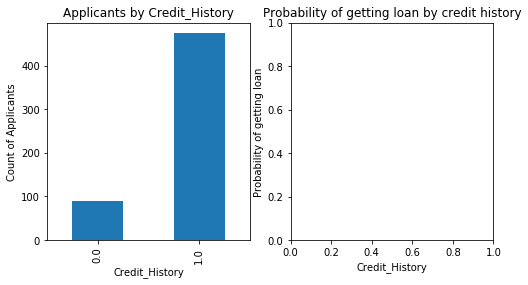

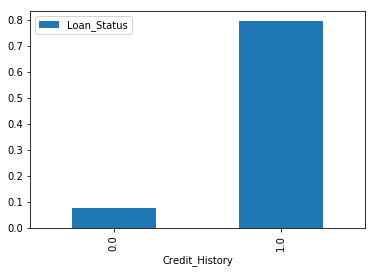

In [176]:
#This can be plotted as a bar chart using the “matplotlib” library 
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')
ax2=fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
#

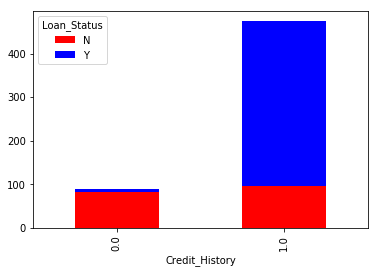

In [179]:
#Alternately, these two plots can also be visualized by combining them in a stacked chart::
temp3=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False);

## Data Munging in Python : Using Pandas

In [229]:
#Check missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Bin        0
Loan_Status_Coded     0
LoanAmount_log        0
Total_Income          0
dtype: int64

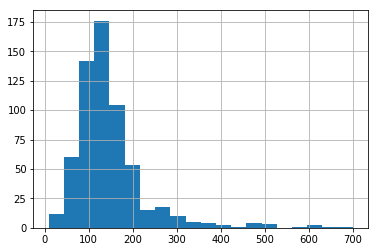

In [188]:
#How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?
df['LoanAmount'].hist(bins=20);

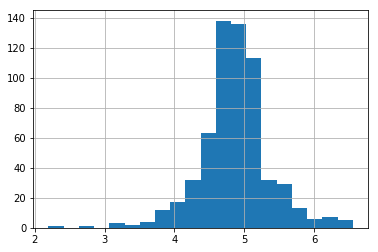

In [189]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20);

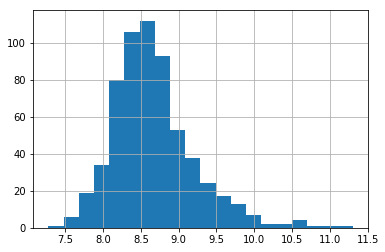

In [194]:
df['Total_Income']=(df['ApplicantIncome']+df['CoapplicantIncome'])
np.log(df['Total_Income']).hist(bins=20)

# Building a Predictive Model in Python

In [243]:
from sklearn import datasets

from sklearn import metrics

#sklearn requires all inputs to be numeric
from sklearn.preprocessing import LabelEncoder

var_mod=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()

for i in df.iloc[:,0:]:
    #print(i)
    df[i].fillna(mode(df[i].dropna()).mode[0],inplace=True)
    df[i]=le.fit_transform(df[i])


    
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Bin,Loan_Status_Coded,LoanAmount_log,Total_Income
0,0,1,0,0,0,0,376,0,85,8,1,2,1,2,1,85,320
1,1,1,1,1,0,0,306,60,83,8,1,0,0,2,0,83,333
2,2,1,1,0,0,1,139,0,26,8,1,2,1,1,1,26,42
3,3,1,1,0,1,0,90,160,74,8,1,2,1,2,1,74,238
4,4,1,0,0,0,0,381,0,98,8,1,2,1,0,1,98,327
5,5,1,1,2,0,1,353,241,174,8,1,2,1,3,1,174,464
6,6,1,1,0,1,0,65,61,48,8,1,2,1,2,1,48,118
7,7,1,1,3,0,0,146,174,115,8,0,1,0,0,0,115,292
8,8,1,1,2,0,0,269,63,124,8,1,2,1,0,1,124,291
9,9,1,1,1,0,0,470,282,191,8,1,1,0,3,0,191,542
